In [229]:
# import libraries

import pandas as pd
import re
import plotly.express as px 
import seaborn as sns
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 




from nltk.sentiment.vader import SentimentIntensityAnalyzer
polarity = SentimentIntensityAnalyzer()
countVectorize = CountVectorizer()

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [230]:
# read file 
df = pd.read_csv('/Users/mac/Downloads/all_kindle_review .csv')
print(df)

       Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11995         11995        2183  B001DUGORO   [0, 0]       4   
11996         11996        6272  B002JCSFSQ   [2, 2]       5   
11997         11997       12483  B0035N1V7K   [0, 1]       3   
11998         11998        3640  B001W1XT40   [1, 2]       1   
11999         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow...   10 8, 2013   
2      I'll 

In [231]:
df.shape

(12000, 11)

In [232]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [233]:
df_n= df[['reviewText','rating']]
print(df_n)

                                              reviewText  rating
0      Jace Rankin may be short, but he's nothing to ...       3
1      Great short read.  I didn't want to put it dow...       5
2      I'll start by saying this is the first of four...       3
3      Aggie is Angela Lansbury who carries pocketboo...       3
4      I did not expect this type of book to be in li...       4
...                                                  ...     ...
11995  Valentine cupid is a vampire- Jena and Ian ano...       4
11996  I have read all seven books in this series. Ap...       5
11997  This book really just wasn't my cuppa.  The si...       3
11998  tried to use it to charge my kindle, it didn't...       1
11999  Taking Instruction is a look into the often hi...       3

[12000 rows x 2 columns]


In [234]:
df_n['rating'].value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

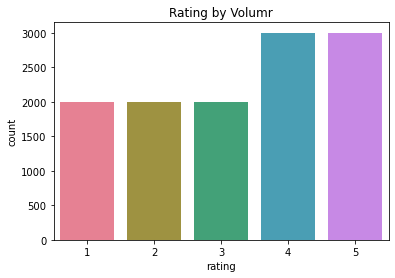

<Figure size 1008x648 with 0 Axes>

In [235]:
# plot rating

sns.countplot(x=df_n['rating'],palette = 'husl')
plt.title('Rating by Volumr')
plt.figure(figsize=(14,9))
plt.show()

In [236]:
# pre process text
import contractions
contractions.contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [237]:
df_n['reviewText'].replace('Text')

0        Jace Rankin may be short, but he's nothing to ...
1        Great short read.  I didn't want to put it dow...
2        I'll start by saying this is the first of four...
3        Aggie is Angela Lansbury who carries pocketboo...
4        I did not expect this type of book to be in li...
                               ...                        
11995    Valentine cupid is a vampire- Jena and Ian ano...
11996    I have read all seven books in this series. Ap...
11997    This book really just wasn't my cuppa.  The si...
11998    tried to use it to charge my kindle, it didn't...
11999    Taking Instruction is a look into the often hi...
Name: reviewText, Length: 12000, dtype: object

In [238]:
# rename column to text 
df_n = df_n.rename(columns = {'reviewText': 'text'})

In [239]:
# remove html tags 

def strip(text):
    soup =BeautifulSoup(text,'html.parser')
    return soup.get_text()


In [240]:
# apply strip function 

df_n['text'] = df_n['text'].apply(strip)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [241]:
# convert to lower case
df_n['text']=df_n['text'].str.lower()

In [242]:
df_n['text']

0        jace rankin may be short, but he's nothing to ...
1        great short read.  i didn't want to put it dow...
2        i'll start by saying this is the first of four...
3        aggie is angela lansbury who carries pocketboo...
4        i did not expect this type of book to be in li...
                               ...                        
11995    valentine cupid is a vampire- jena and ian ano...
11996    i have read all seven books in this series. ap...
11997    this book really just wasn't my cuppa.  the si...
11998    tried to use it to charge my kindle, it didn't...
11999    taking instruction is a look into the often hi...
Name: text, Length: 12000, dtype: object

In [243]:
# remove punctuation 
def punc(text):
    return re.sub('[^a-z A-Z 0-9-]+', '', text)

In [244]:
# apply punctuation function

df_n['text']=df_n['text'].apply(punc)

In [245]:
df_n.head()

,text,rating
0,jace rankin may be short but hes nothing to me...,3
1,great short read i didnt want to put it down ...,5
2,ill start by saying this is the first of four ...,3
3,aggie is angela lansbury who carries pocketboo...,3
4,i did not expect this type of book to be in li...,4


In [246]:
# remove hashtags 

def hashtag(text):
    return re.sub('#\w+','',text)

df_n['text']=df_n['text'].apply(hashtag)

In [247]:
# remove number 
def email(text):
    return re.sub('([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '',text)

df_n['text'] = df_n['text'].apply(email)




In [248]:
def punct(text):
    return re.findall('[^\w\s\d]',text)

df_n['text'].apply(punct)




0        [-, -, -, -, -, -, -, -, -]
1                                [-]
2                                 []
3                                [-]
4                                 []
                    ...             
11995                         [-, -]
11996                             []
11997                             []
11998                             []
11999                         [-, -]
Name: text, Length: 12000, dtype: object

In [249]:
# remove punctuation
def remove_punct(text):
    return re.sub("[^\w\s\d]","",text)


df_n['text']=df_n['text'].apply(remove_punct)

In [250]:
# print sample of stopwords

stopw = set(stopwords.words('english'))
print(stopw)

{'so', 'some', 'himself', 'own', 'you', 'from', 'more', "you'll", 'being', 'having', 'd', 'herself', 'their', 'they', 'haven', 'it', 'but', "doesn't", 'why', 'same', 'my', 'am', 'hers', 'both', "mustn't", "didn't", 'him', 'below', 'this', 'was', 'there', 'doesn', 'while', 'until', 'yourselves', 'on', 'under', 'as', "couldn't", "isn't", "shouldn't", 'itself', 've', 'been', 'does', 'just', "haven't", 'wasn', 'll', "weren't", 'in', 'up', 'for', 'weren', 'before', 'these', 'at', 'such', 'again', 'is', 'be', 'ours', 'yours', 'myself', 'whom', 'has', 'most', 'mustn', 'out', 'do', 'shan', 'all', "won't", 'how', 'themselves', 'he', 'into', 'who', 'between', 'mightn', "she's", 're', 'ain', "it's", 'his', 'only', 'wouldn', 'hadn', "you'd", 'about', 'don', 'through', 'those', 'should', 'our', 'an', 'ma', 'a', 't', 'had', 'above', "hasn't", 'with', "you've", 'are', 'doing', 'than', 'couldn', 'what', 'when', 'of', 'each', 'that', "aren't", "wasn't", 'won', 'over', 'she', 'because', "shan't", 'again

In [251]:
# remove stopwords


def stop(text):
    words=''.join(text)
    return " ".join([word for word in words.split() if word not in stopw])

df_n['text']=df_n['text'].apply(stop)

In [252]:
# use vader to classify words according to positive , negative and neutral

scores=[]
for i in range(len(df_n['text'])):
    
    score = polarity.polarity_scores(df_n['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_n['sentiment']=pd.Series(np.array(sentiment))


In [253]:
# run vader on text 

test = df_n['text'].apply(lambda text: polarity.polarity_scores(text))
print(test)


0        {'neg': 0.157, 'neu': 0.612, 'pos': 0.23, 'com...
1        {'neg': 0.065, 'neu': 0.534, 'pos': 0.401, 'co...
2        {'neg': 0.055, 'neu': 0.742, 'pos': 0.203, 'co...
3        {'neg': 0.127, 'neu': 0.759, 'pos': 0.114, 'co...
4        {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
                               ...                        
11995    {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...
11996    {'neg': 0.101, 'neu': 0.412, 'pos': 0.487, 'co...
11997    {'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...
11998    {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...
11999    {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...
Name: text, Length: 12000, dtype: object


In [254]:


convert = test.apply(pd.Series)
print(convert)

         neg    neu    pos  compound
0      0.157  0.612  0.230    0.9607
1      0.065  0.534  0.401    0.9600
2      0.055  0.742  0.203    0.7650
3      0.127  0.759  0.114   -0.1280
4      0.000  0.707  0.293    0.4404
...      ...    ...    ...       ...
11995  0.000  0.702  0.298    0.8020
11996  0.101  0.412  0.487    0.9829
11997  0.000  0.920  0.080    0.4019
11998  0.339  0.661  0.000   -0.7316
11999  0.000  0.839  0.161    0.8316

[12000 rows x 4 columns]


In [255]:
# convert to dataframe  

df_c =pd.DataFrame(convert)
print(df_c)

         neg    neu    pos  compound
0      0.157  0.612  0.230    0.9607
1      0.065  0.534  0.401    0.9600
2      0.055  0.742  0.203    0.7650
3      0.127  0.759  0.114   -0.1280
4      0.000  0.707  0.293    0.4404
...      ...    ...    ...       ...
11995  0.000  0.702  0.298    0.8020
11996  0.101  0.412  0.487    0.9829
11997  0.000  0.920  0.080    0.4019
11998  0.339  0.661  0.000   -0.7316
11999  0.000  0.839  0.161    0.8316

[12000 rows x 4 columns]


In [256]:
# combine 2 dataframes 

test_d= pd.concat([df_c,df_n], axis = 1)
print(test_d)

         neg    neu    pos  compound  \
0      0.157  0.612  0.230    0.9607   
1      0.065  0.534  0.401    0.9600   
2      0.055  0.742  0.203    0.7650   
3      0.127  0.759  0.114   -0.1280   
4      0.000  0.707  0.293    0.4404   
...      ...    ...    ...       ...   
11995  0.000  0.702  0.298    0.8020   
11996  0.101  0.412  0.487    0.9829   
11997  0.000  0.920  0.080    0.4019   
11998  0.339  0.661  0.000   -0.7316   
11999  0.000  0.839  0.161    0.8316   

                                                    text  rating sentiment  
0      jace rankin may short hes nothing mess man hau...       3  Positive  
1      great short read didnt want put read one sitti...       5  Positive  
2      ill start saying first four books wasnt expect...       3  Positive  
3      aggie angela lansbury carries pocketbooks inst...       3  Negative  
4      expect type book library pleased find price right       4  Positive  
...                                                  ... 

In [257]:
# display combined dataframes 

test_d.head(15)

,neg,neu,pos,compound,text,rating,sentiment
0,0.157,0.612,0.230,0.9607,jace rankin may short hes nothing mess man hau...,3,Positive
1,0.065,0.534,0.401,0.9600,great short read didnt want put read one sitti...,5,Positive
2,0.055,0.742,0.203,0.7650,ill start saying first four books wasnt expect...,3,Positive
3,0.127,0.759,0.114,-0.1280,aggie angela lansbury carries pocketbooks inst...,3,Negative
4,0.000,0.707,0.293,0.4404,expect type book library pleased find price right,4,Positive
5,0.110,0.463,0.426,0.9967,aislinn little girl big dreams death older bro...,5,Positive
6,0.164,0.727,0.109,-0.3400,makings good story unfortunately disappointsit...,2,Negative
7,0.033,0.691,0.276,0.9835,got like collaborated short stories alot times...,4,Positive
8,0.000,0.618,0.382,0.7783,loved book hooked series hope kelsey maxwell r...,5,Positive
9,0.126,0.549,0.324,0.5574,thats good thing short sweet tease gives every...,4,Positive


In [258]:
df_n

,text,rating,sentiment
0,jace rankin may short hes nothing mess man hau...,3,Positive
1,great short read didnt want put read one sitti...,5,Positive
2,ill start saying first four books wasnt expect...,3,Positive
3,aggie angela lansbury carries pocketbooks inst...,3,Negative
4,expect type book library pleased find price right,4,Positive
...,...,...,...
11995,valentine cupid vampire jena ian another vampi...,4,Positive
11996,read seven books series apocalypticadventure o...,5,Positive
11997,book really wasnt cuppa situation man capturin...,3,Positive
11998,tried use charge kindle didnt even register ch...,1,Negative


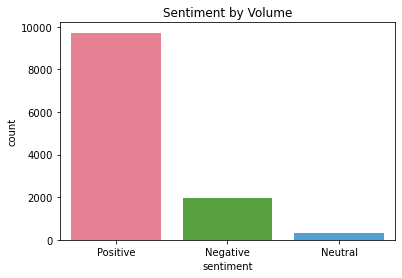

<Figure size 1008x648 with 0 Axes>

In [259]:
# Display sentiments by count / Volume

sns.countplot(x=df_n['sentiment'],palette = 'husl')
plt.title('Sentiment by Volume')
plt.figure(figsize=(14,9))
plt.show()

In [260]:
# apply tokenization to convert words to tokens 
def token(text):
    text = re.split('\W+', text)
    return text

df_n['tokenized']= df_n['text'].apply(lambda x: token(x.lower()))


# apply stemmer 
ps =nltk.PorterStemmer()
def stemmer(text):
    text =[ps.stem(word) for word in text]
    return text 

df_n['Stemmed'] = df_n['text'].apply(lambda x: stemmer(x))

df_n['final'] = df_n['Stemmed'].apply(lambda x : ''.join(x))

In [261]:
df_n['rating'] = df_n['rating'].apply(lambda x : 1 if x < 3 else 0) 

In [262]:
# create word cloud 

zero_rating = df_n['text'][df_n['rating'] == 0]

one_rating = df_n['text'][df_n['rating'] == 1]

def word_token(rating):
   ratings = ''.join(rating)
   ratings = nltk.word_tokenize(ratings)
   return str(ratings)


 # plot wordcloud image


def word_cloud(rating, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(rating)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');
    
    

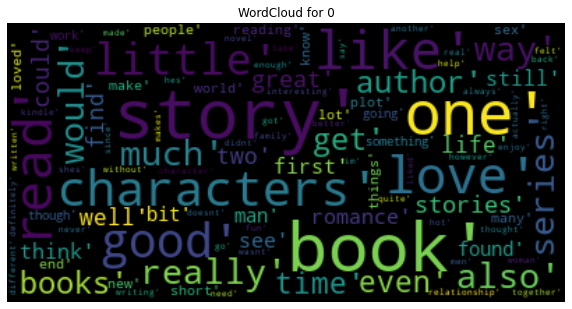

In [263]:
word_cloud(word_token(zero_rating),0)

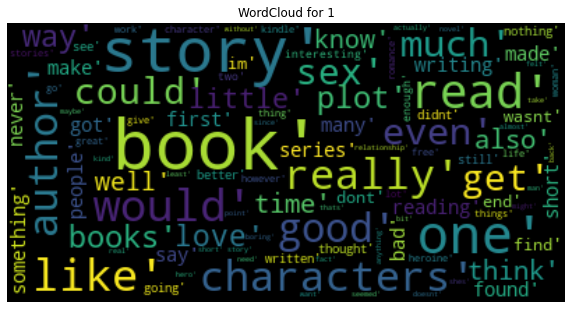

In [264]:
word_cloud(word_token(one_rating),1)

In [265]:
# data split

xtrain , xtest , ytrain, ytest = train_test_split(df_n['text'], df_n['rating'], test_size=0.3)

In [266]:
# convert words for vectors

xtrain_bow = countVectorize.fit_transform(xtrain).toarray()
xtest_bow = countVectorize.transform(xtest).toarray()

In [267]:
# Bag of words approach 
classify = GaussianNB().fit(xtrain_bow , ytrain)
prediction = classify.predict(xtest_bow)

In [268]:
#  checking model 

def stats(prediction, actual):
    print('Confusion Matrix' , confusion_matrix(actual,prediction))
    print('Accuracy' ,accuracy_score(actual, prediction))
    print('Classification report')
    print(classification_report(actual,prediction))


stats(prediction,ytest)

Confusion Matrix [[1447  961]
 [ 461  731]]
Accuracy 0.605
Classification report
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      2408
           1       0.43      0.61      0.51      1192

    accuracy                           0.60      3600
   macro avg       0.60      0.61      0.59      3600
weighted avg       0.65      0.60      0.62      3600

